# IBM DATA SCIENCE

## Capstone Project

**Introduction**

<p> Some would argue that health related problems are the leading cause of death amongst people. Well, according to the Center for Disease Control (CDC)the prominent cause of deaths each day is infact due to road accidents. CDC reports 3,700 people killed everyday on the road globally and approximately 1.35 million deaths annually due to accidents (https://www.cdc.gov/injury/features/global-road-safety/index.html). Weather being one of the bigger factor for these incidents.I want to focus on weather, daylight hazards, and road conditions for the analysis.
<p>Hence, it is imperative for us to study the data on accidents and draw some conclusions to find any preventative measures. The data that I am using is part of the sample data which consists of "severity column" that will be used in various predictive algorithms with independent variables like weather, road conditions, and light conditions.

###  ***Table of Contents***
1. [Data_Observation](#Data-Observation)
2. [Data Wrangling](#Data-Wrangling)
3. [Data Visualization](#Data-Visualization)
4. [Pre Proccessing](#Data-Pre-Processing)
5. [Modeling](#Data-Modeling)
    1. [Decision Tree Classification](#Data-DTC)
    1. [Random Forest Classification](#Data-RFC)
    1. [Logistic Regression](#Data-LR)
6. [Results](#Data-Results)

#### 1. Data Observation <a name="Data-Observation"></a>

In [707]:
#Libraries

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools


import folium
from folium.plugins import MarkerCluster

import warnings
warnings.filterwarnings('ignore')

In [594]:
df1=pd.read_csv("Collision_Data.csv")
df1.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [595]:
#amount of rows and columns this dataframe consist of:

print("Rows :", df1.shape[0])
print("Columns :", df1.shape[1])

Rows : 194673
Columns : 38


In [596]:
df1.info() #Shows that we have 38 columns (0-37) and the non-null items in each

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

#### 2. Data Wrangling <a name='Data-Wrangling'></a>

In [597]:
#Finding the null values and dropping the specific ones that miss larger portion of the data.
df1.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [598]:
#dropping columns because they are missing more than half of values (I am keeping the X and Y columns since they are the same as the Location column)
df1.drop(['SDOTCOLNUM','PEDROWNOTGRNT','INATTENTIONIND','LOCATION','INTKEY','EXCEPTRSNDESC','EXCEPTRSNCODE','SPEEDING'], axis=1, inplace=True)

In [599]:
#Eliminated 8 columns
print("Updated Rows :", df1.shape[0])
print("Updated Columns :", df1.shape[1])

Updated Rows : 194673
Updated Columns : 30


In [600]:
#Comparing alike columns using bool
df1['SEVERITYCODE'].equals(df1['SEVERITYCODE.1'])

True

In [601]:
#Drop one of them. 
df1.drop(['SEVERITYCODE.1'], axis=1, inplace=True)

In [602]:
df1.shape #Eliminated one more column

(194673, 29)

In [603]:
#Finding values within each columns:
df1.groupby('COLLISIONTYPE')['COLLISIONTYPE'].agg('count') #we see that there are various types.

COLLISIONTYPE
Angles        34674
Cycles         5415
Head On        2024
Left Turn     13703
Other         23703
Parked Car    47987
Pedestrian     6608
Rear Ended    34090
Right Turn     2956
Sideswipe     18609
Name: COLLISIONTYPE, dtype: int64

In [604]:
df1['COLLISIONTYPE'].isnull().sum() 
#We see that there are 4904 values missing from this column and so we will replace it with 

4904

In [605]:
#Lets see which values occur the most and replace those in place of the missing values
df1['COLLISIONTYPE'].value_counts() #Here we see its the parked car, we can also find the max index value using idxmax()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [606]:
#lets find most frequent values for the rest:

print("Most frequent value for COLLISIONTYPE is :", df1['COLLISIONTYPE'].value_counts().idxmax())
print("Most frequent value for ADDRTYPE is :", df1['ADDRTYPE'].value_counts().idxmax())
print("Most frequent value for JUNCTIONTYPE is :", df1['JUNCTIONTYPE'].value_counts().idxmax())
print("Most frequent value for UNDERINFL is :", df1['UNDERINFL'].value_counts().idxmax())
print("Most frequent value for WEATHER is :", df1['WEATHER'].value_counts().idxmax())
print("Most frequent value for ROADCOND is :", df1['ROADCOND'].value_counts().idxmax())
print("Most frequent value for LIGHTCOND is :", df1['LIGHTCOND'].value_counts().idxmax())

Most frequent value for COLLISIONTYPE is : Parked Car
Most frequent value for ADDRTYPE is : Block
Most frequent value for JUNCTIONTYPE is : Mid-Block (not related to intersection)
Most frequent value for UNDERINFL is : N
Most frequent value for WEATHER is : Clear
Most frequent value for ROADCOND is : Dry
Most frequent value for LIGHTCOND is : Daylight


In [607]:
#Replace the values
df1['COLLISIONTYPE'].replace(np.nan,'Parked Car', inplace=True)
df1['ADDRTYPE'].replace(np.nan,'Block', inplace=True)
df1['JUNCTIONTYPE'].replace(np.nan,'Mid-Block (not related to intersection)', inplace=True)
df1['UNDERINFL'].replace(np.nan,'N', inplace=True)
df1['WEATHER'].replace(np.nan,'Clear', inplace=True)
df1['ROADCOND'].replace(np.nan,'Dry', inplace=True)
df1['LIGHTCOND'].replace(np.nan,'Daylight', inplace=True)

In [608]:
#recheck
df1['COLLISIONTYPE'].isnull().sum() 

0

In [609]:
#Examining the remaining columns that I dont know much about.
other_df=['OBJECTID','INCKEY','COLDETKEY','REPORTNO','SDOT_COLCODE','ST_COLCODE','SEGLANEKEY','CROSSWALKKEY']
for column in other_df:
    print (column + ": {}".format(len(df1[column].unique())))

OBJECTID: 194673
INCKEY: 194673
COLDETKEY: 194673
REPORTNO: 194670
SDOT_COLCODE: 39
ST_COLCODE: 116
SEGLANEKEY: 1955
CROSSWALKKEY: 2198


In [610]:
#OBJECTID, INCKEY, and COLDETKEY have the same number of unique values therefore, it does not add to the df.
#I am going to drop these columns:

df1.drop(['OBJECTID','INCKEY','COLDETKEY'], axis=1, inplace=True)

In [611]:
#We went from 29 to 26
df1.shape

(194673, 26)

In [612]:
#examination of other columns containing date and time
df1['INCDATE'].unique() # only date

array(['2013/03/27 00:00:00+00', '2006/12/20 00:00:00+00',
       '2004/11/18 00:00:00+00', ..., '2020/05/08 00:00:00+00',
       '2020/05/14 00:00:00+00', '2020/05/19 00:00:00+00'], dtype=object)

In [613]:
df1['INCDTTM'].unique() #has date and time so INCDATE is just repatitive

array(['3/27/2013 2:54:00 PM', '12/20/2006 6:55:00 PM',
       '11/18/2004 10:20:00 AM', ..., '1/19/2019 9:25:00 AM',
       '1/15/2019 4:48:00 PM', '11/30/2018 3:45:00 PM'], dtype=object)

In [614]:
#Dropping INCDATE
df1.drop(['INCDATE'],axis=1,inplace=True)
df1.shape #26 to 25

(194673, 25)

In [615]:
#I have 4 columns left to study and they contain text information. I will keep these for graphing purposes.
df1[['SEVERITYDESC','SDOT_COLDESC','ST_COLDESC','SEVERITYCODE']]  

,SEVERITYDESC,SDOT_COLDESC,ST_COLDESC,SEVERITYCODE
0,Injury Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Entering at angle,2
1,Property Damage Only Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",From same direction - both going straight - bo...,1
2,Property Damage Only Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",One parked--one moving,1
3,Property Damage Only Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",From same direction - all others,1
4,Injury Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Entering at angle,2
...,...,...,...,...
194668,Injury Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",From opposite direction - both moving - head-on,2
194669,Property Damage Only Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",From same direction - both going straight - bo...,1
194670,Injury Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",From opposite direction - one left turn - one ...,2
194671,Injury Collision,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Vehicle Strikes Pedalcyclist,2


In [616]:
#Categorical Columns
#To view these I am making a new list "cat"
cat=df1[['ADDRTYPE','COLLISIONTYPE','SEVERITYCODE','STATUS','JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR']]

In [617]:
#There is now unknown values in these columns that i want to change to max
cat.apply(pd.value_counts)

,ADDRTYPE,COLLISIONTYPE,SEVERITYCODE,STATUS,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
1,NaN,NaN,136485.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,58188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,80394.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,3995.0,NaN,NaN,NaN,NaN
Alley,751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angles,NaN,34674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
At Intersection (but not related to intersection),NaN,NaN,NaN,NaN,2098.0,NaN,NaN,NaN,NaN,NaN
At Intersection (intersection related),NaN,NaN,NaN,NaN,62810.0,NaN,NaN,NaN,NaN,NaN
Block,128852.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blowing Sand/Dirt,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [618]:
#I can confirm this more specifically by calling value_count() function:
df1['WEATHER'].value_counts()#unknown=15091

Clear                       116216
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [619]:
#changing all unknown values to its most appearing values (similar to NaN i used earlier)
df1['WEATHER'].replace('Unknown','Clear', inplace=True)
df1['ROADCOND'].replace('Unknown','Dry', inplace=True)
df1['LIGHTCOND'].replace('Unknown','Daylight', inplace=True)
df1['JUNCTIONTYPE'].replace('Unknown','Mid-Block (not related to intersection)', inplace=True)
#recheck
df1['WEATHER'].value_counts()

Clear                       131307
Raining                      33145
Overcast                     27714
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [620]:
#changing values
df1['UNDERINFL'].value_counts()

N    105158
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [621]:
df1.loc[df1.UNDERINFL=='0','UNDERINFL']= "N"
df1.loc[df1.UNDERINFL=='1','UNDERINFL']= "Y"

#recheck
df1['UNDERINFL'].value_counts()

N    185552
Y      9121
Name: UNDERINFL, dtype: int64

In [622]:
df1['HITPARKEDCAR'].value_counts() #this is fine as is

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [623]:
#Checking to see which other columns have null values
df1.columns[df1.isna().any()].tolist()

['X', 'Y', 'ST_COLCODE', 'ST_COLDESC']

In [624]:
df1.ST_COLDESC.value_counts() #ST_COLDESC has more info and values compared to ST_COLCODE

One parked--one moving                                                 44421
Entering at angle                                                      34674
From same direction - both going straight - one stopped - rear-end     25771
Fixed object                                                           13554
From same direction - both going straight - both moving - sideswipe    12777
                                                                       ...  
Vehicle Strikes All Other Non-Domestic Animal                              2
Railway Vehicle Strikes Pedalcyclist                                       2
Vehicle Strikes Deer                                                       1
Vehicle Hits State Road or Construction Machinery                          1
Non-domestic animal (deer, bear, elk, etc)                                 1
Name: ST_COLDESC, Length: 62, dtype: int64

In [625]:
#dropping ST_COLCODE
df1.drop(['ST_COLCODE'], axis=1, inplace=True)
df1.shape #25 to 24

(194673, 24)

In [626]:
#changing to datetime
df1[['INCDTTM']]= df1[['INCDTTM']].astype('datetime64')
df1.dtypes

SEVERITYCODE              int64
X                       float64
Y                       float64
REPORTNO                 object
STATUS                   object
ADDRTYPE                 object
SEVERITYDESC             object
COLLISIONTYPE            object
PERSONCOUNT               int64
PEDCOUNT                  int64
PEDCYLCOUNT               int64
VEHCOUNT                  int64
INCDTTM          datetime64[ns]
JUNCTIONTYPE             object
SDOT_COLCODE              int64
SDOT_COLDESC             object
UNDERINFL                object
WEATHER                  object
ROADCOND                 object
LIGHTCOND                object
ST_COLDESC               object
SEGLANEKEY                int64
CROSSWALKKEY              int64
HITPARKEDCAR             object
dtype: object

In [627]:
#changing data to categorical data type
new_cat=['SEVERITYCODE','STATUS','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE', 'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR']

In [628]:
df1[new_cat]=df1[new_cat].astype('category')

In [629]:
#recheck
df1.dtypes

SEVERITYCODE           category
X                       float64
Y                       float64
REPORTNO                 object
STATUS                 category
ADDRTYPE               category
SEVERITYDESC             object
COLLISIONTYPE          category
PERSONCOUNT               int64
PEDCOUNT                  int64
PEDCYLCOUNT               int64
VEHCOUNT                  int64
INCDTTM          datetime64[ns]
JUNCTIONTYPE           category
SDOT_COLCODE              int64
SDOT_COLDESC             object
UNDERINFL              category
WEATHER                category
ROADCOND               category
LIGHTCOND              category
ST_COLDESC               object
SEGLANEKEY                int64
CROSSWALKKEY              int64
HITPARKEDCAR           category
dtype: object

##### Summary:

we have 3 separate dataframes
1. `df1`
2. `cat`
3. `new_cat`

our main dataframe is `df1` and I have used `cat` and `new_cat` to analyze columns and change their types. Now the data looks cleaner and organized enough for graphical analysis.
    

#### 3. Data Visualization <a name="Data-Visualization"></a>

In [630]:
# First I want to explore the X and Y columns because they haven't been analyzed yet. 
# so, I want to create a map to find out the location that this dataset is exploring. 

lat= df1['Y'].mean() #by taking the mean I am avoiding the error of missing values 
lon= df1['X'].mean()

df1_map = folium.Map(location=[lat,lon], zoom_start=12)
df1_map

In [631]:
#lets see where the acccidents have happened:

df1_map_cluster= MarkerCluster().add_to(df1_map) #our map
location=df1[['Y','X']][df1['X'].notnull()][:4000]
loc = location.values.tolist()
for i in range (len(loc)):
    folium.Marker(loc[i]).add_to(df1_map_cluster)
df1_map

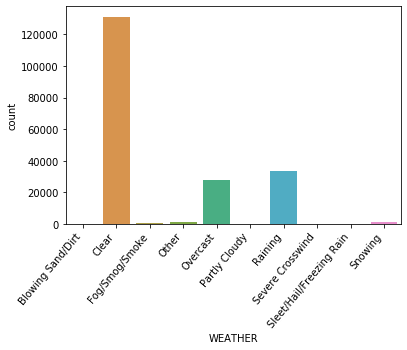

In [632]:
#Shows the count of incidents as per various weather conditions. 
plt.style.use('seaborn-bright')
axs=sns.countplot(df1['WEATHER'])
axs.set_xticklabels(axs.get_xticklabels(),rotation=50, horizontalalignment='right')
plt.savefig('./CAPSTONE_IMAGES/1.png')
plt.show()

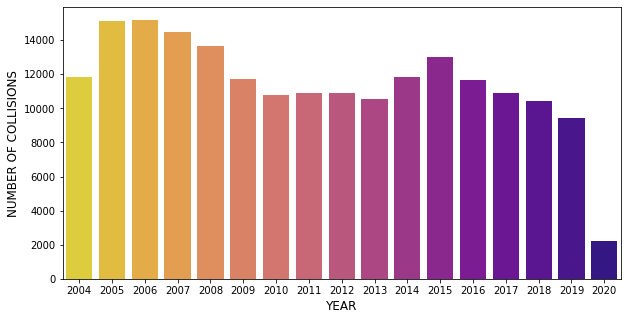

In [633]:
#Number of collisions acros years
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(df1['INCDTTM'].dt.year, palette= 'plasma_r', ax=ax)
ax.set_xlabel("YEAR", fontsize=12)
ax.set_ylabel("NUMBER OF COLLISIONS", fontsize=12)
plt.savefig('./CAPSTONE_IMAGES/2.png')
plt.show()

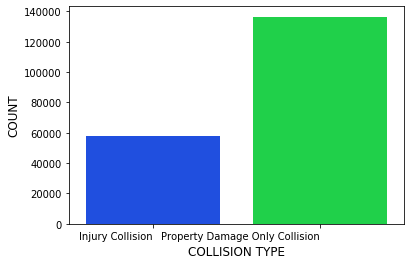

In [634]:
#Most frequent type of collision
plt.style.use('seaborn-bright')
ax1=sns.countplot(df1['SEVERITYDESC'])
ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='right')
plt.xlabel("COLLISION TYPE", fontsize=12)
plt.ylabel("COUNT", fontsize=12)
plt.savefig("./CAPSTONE_IMAGES/3.png")
plt.show()

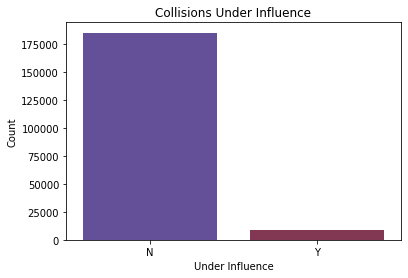

In [635]:
#under influence collission
plt.figure(figsize=(6,4))
sns.countplot(x='UNDERINFL', palette='twilight', data=df1)
plt.title("Collisions Under Influence")
plt.xlabel("Under Influence")
plt.ylabel("Count")
plt.savefig("./CAPSTONE_IMAGES/4.png")
plt.show()

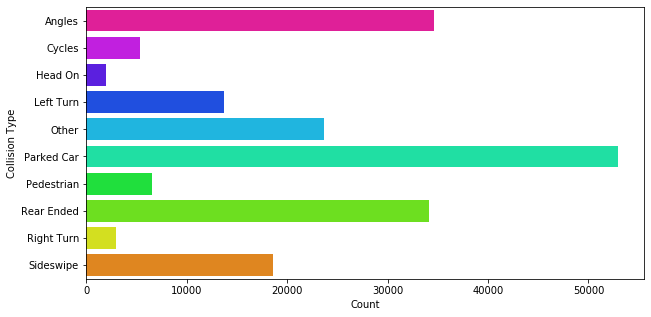

In [636]:
#exploring collision type
plt.figure(figsize=(10,5))
sns.countplot(y='COLLISIONTYPE', palette='hsv_r', data=df1)
plt.xlabel("Count")
plt.ylabel("Collision Type")
plt.savefig("./CAPSTONE_IMAGES/5.png")
plt.show()

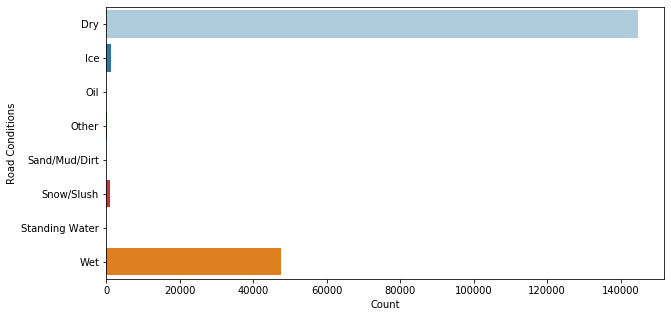

In [637]:
#Exploring Road Conditions
plt.figure(figsize=(10,5))
sns.countplot(y='ROADCOND', palette='Paired', data=df1)
plt.xlabel("Count")
plt.ylabel("Road Conditions")
plt.savefig("./CAPSTONE_IMAGES/6.png")
plt.show()

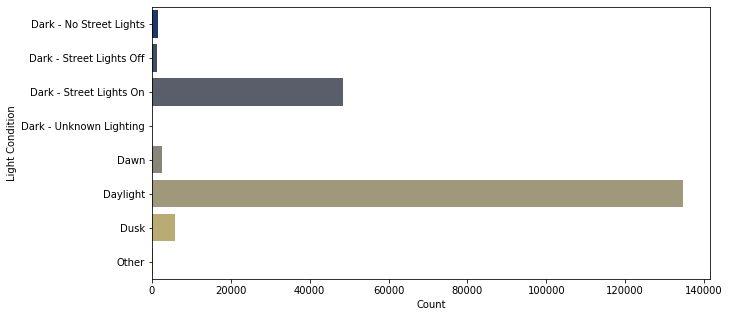

In [638]:
#Exploring Light Conditions 
plt.figure(figsize=(10,5))
sns.countplot(y='LIGHTCOND', palette='cividis', data=df1)
plt.xlabel("Count")
plt.ylabel("Light Condition")
plt.savefig("./CAPSTONE_IMAGES/7.png")
plt.show()

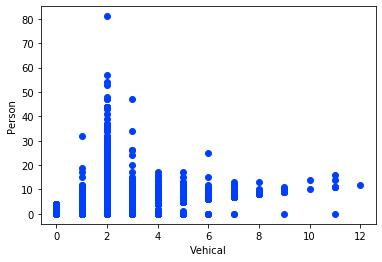

In [639]:
#scatter plot to show count of people in vehicle
ax2=plt.scatter(df1['VEHCOUNT'], df1['PERSONCOUNT'])
plt.xlabel("Vehical")
plt.ylabel("Person")
plt.savefig("./CAPSTONE_IMAGES/8.png")
plt.show()

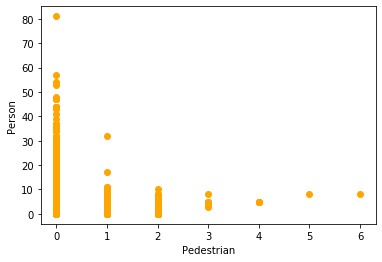

In [640]:
#Scatter plot showing pedestrian count as per person.  
plt.scatter(df1['PEDCOUNT'], df1['PERSONCOUNT'], c='orange')
plt.xlabel("Pedestrian")
plt.ylabel("Person")
plt.savefig("./CAPSTONE_IMAGES/9.png")
plt.show()

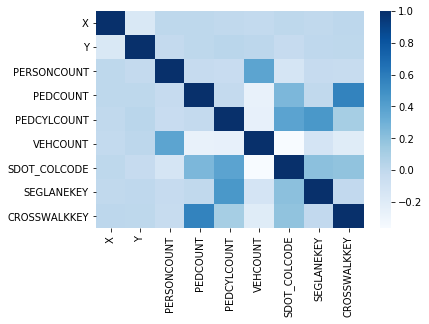

In [641]:
# showing correlation matrix of the dataframe using categorical variables. 
sns.heatmap(df1.corr(), cmap='Blues')
plt.show()

`Data visualization` provided great insights to various columns showing significance. Overall, now it is evident that using the longitude and latitude present in the `X` and `Y` column, the data is observing accident severity for the `Seattle city` in `Washington state`. Using `countplot` and `scatter plot` the findings gained a direction. 

#### 4. Pre Processing <a name="Data-Pre-Processing"></a>

In [643]:
#Focusing on columns I want to run my models.
df1.head()

,SEVERITYCODE,X,Y,REPORTNO,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,3502005,Matched,Intersection,Injury Collision,Angles,2,0,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2607959,Matched,Block,Property Damage Only Collision,Sideswipe,2,0,...,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",N,Raining,Wet,Dark - Street Lights On,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,1482393,Matched,Block,Property Damage Only Collision,Parked Car,4,0,...,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,Overcast,Dry,Daylight,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,3503937,Matched,Block,Property Damage Only Collision,Other,3,0,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,1807429,Matched,Intersection,Injury Collision,Angles,2,0,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Daylight,Entering at angle,0,0,N


In [646]:
#I would like my models to be specifically related to weather conditions and severity
df1 = df1.loc[:,['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df1.dropna(inplace=True)
df1.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [648]:
df1.shape #dimensionality reduction

(194673, 4)

In [649]:
#Finding unique columns and checking the quantity of labels in each column
for c in df1.columns:
    print(c,": ",len(df1[c].unique()),'labels')

SEVERITYCODE :  2 labels
WEATHER :  10 labels
ROADCOND :  8 labels
LIGHTCOND :  8 labels


In [650]:
df1['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,134780
Dark - Street Lights On,48507
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [651]:
df1['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,144600
Wet,47474
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [652]:
df1['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,131307
Raining,33145
Overcast,27714
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25
Partly Cloudy,5


In [673]:
#Creating filters instead of dummy variables
f1 = {'Clear':1,'Raining':2,'Overcast':3,'Snowing':4,'Other':5,'Fog/Smog/Smoke':6,
         'Sleet/Hail/Freezing Rain':7,'Blowing Sand/Dirt':8,'Severe Crosswind':9,'Partly Cloudy':10}
f2 = {'Dry':1,'Wet':2,'Ice':3,'Snow/Slush':4,'Other':5,'Standing Water':6,'Sand/Mud/Dirt':7,'Oil':8}
f3 = {'Daylight':1,'Dark - Street Lights On':2,'Dusk':3,'Dawn':4,'Dark - No Street Lights':5,
         'Dark - Street Lights Off':6,'Other':7,'Dark - Unknown Lighting':8}

In [684]:
df1['WEATHER_N'] = df1['WEATHER'].replace(f1)
df1['ROADCOND_N'] = df1['ROADCOND'].replace(f2)
df1['LIGHTCOND_N'] = df1['LIGHTCOND'].replace(f3)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [685]:
df1.dtypes

SEVERITYCODE    category
WEATHER            int64
ROADCOND           int64
LIGHTCOND          int64
WEATHER_N          int64
ROADCOND_N         int64
LIGHTCOND_N        int64
dtype: object

In [686]:
df1.SEVERITYCODE.value_counts() 

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [687]:
df1.columns

Index(['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'WEATHER_N',
       'ROADCOND_N', 'LIGHTCOND_N'],
      dtype='object')

In [688]:
X = np.asarray(df1[['WEATHER_N','ROADCOND_N','LIGHTCOND_N']])
X[0:5]

array([[3, 2, 1],
       [2, 2, 2],
       [3, 1, 1],
       [1, 1, 1],
       [2, 2, 1]])

In [689]:
y = np.asarray(df1['SEVERITYCODE'])
y[0:5]

array([2, 1, 1, 1, 2])

In [692]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.77023561,  1.33053279, -0.52395686],
       [ 0.58420748,  1.33053279,  0.72839441],
       [ 1.77023561, -0.52267259, -0.52395686],
       [-0.60182064, -0.52267259, -0.52395686],
       [ 0.58420748,  1.33053279, -0.52395686]])

In [694]:
#20% of sample used for testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('Train set: ',X_train.shape,y_train.shape)
print('Test set: ',X_test.shape,y_test.shape)

Train set:  (155738, 3) (155738,)
Test set:  (38935, 3) (38935,)


#### 5. Modeling <a name="Data-Modeling"></a>

Decision Tree Classification <a name="Data-DTC"></a>

In [702]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(X_train, y_train)
print(tree)
yhat1=tree.predict(X_test)
print("DTM accuracy: ",format(accuracy_score(y_test, yhat1)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
DTM accuracy:  0.7043277256966739


In [703]:
print(classification_report(y_test,yhat1))

              precision    recall  f1-score   support

           1       0.70      1.00      0.83     27424
           2       0.40      0.00      0.00     11511

    accuracy                           0.70     38935
   macro avg       0.55      0.50      0.41     38935
weighted avg       0.61      0.70      0.58     38935



In [716]:
#Scoring Metrics
jacc_DT = metrics.jaccard_score(y_test, yhat1)
f1_DT = metrics.f1_score(y_test, yhat1, average='weighted') 
a_DT = metrics.accuracy_score(y_test, yhat1)


print("K Nearest Neighbors model Accuracy Score", a_DT)
print("K Nearest Neighbors model Jaccard Score: ", jacc_DT)
print("K Nearest Neighbors model F1 Score: ", f1_DT)

K Nearest Neighbors model Accuracy Score 0.7043277256966739
K Nearest Neighbors model Jaccard Score:  0.7043125369224051
K Nearest Neighbors model F1 Score:  0.5822552314190991


Random Forest Classification <a name="Data-RFC"></a>

In [710]:
forest=RandomForestClassifier(n_estimators=75)
forest.fit(X_train,y_train)
print(forest)
yhat2=forest.predict(X_test)
print("RFC acuracy: ",format(accuracy_score(y_test, yhat2)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RFC acuracy:  0.7040708873763966


In [711]:
print(classification_report(y_test,yhat2))

              precision    recall  f1-score   support

           1       0.70      1.00      0.83     27424
           2       0.26      0.00      0.00     11511

    accuracy                           0.70     38935
   macro avg       0.48      0.50      0.41     38935
weighted avg       0.57      0.70      0.58     38935



In [715]:
jacc_RF = metrics.jaccard_score(y_test, yhat2)
f1_RF = metrics.f1_score(y_test, yhat2, average='weighted') 
a_RF = metrics.accuracy_score(y_test, yhat2)


print("K Nearest Neighbors model Accuracy Score", a_RF)
print("K Nearest Neighbors model Jaccard Score: ", jacc_RF)
print("K Nearest Neighbors model F1 Score: ", f1_RF)

K Nearest Neighbors model Accuracy Score 0.7040708873763966
K Nearest Neighbors model Jaccard Score:  0.7040252767859436
K Nearest Neighbors model F1 Score:  0.5823207937215887


Logistic Regression <a name="Data-LR"></a>

In [712]:
lr=LogisticRegression(C=0.06)
lr.fit(X_train,y_train)
print(lr)
yhat3=lr.predict(X_test)
print("LR accuracy: ",format(accuracy_score(y_test,yhat3)))

LogisticRegression(C=0.06, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LR accuracy:  0.7043534095287017


In [713]:
print(classification_report(y_test,yhat3))

              precision    recall  f1-score   support

           1       0.70      1.00      0.83     27424
           2       0.00      0.00      0.00     11511

    accuracy                           0.70     38935
   macro avg       0.35      0.50      0.41     38935
weighted avg       0.50      0.70      0.58     38935



In [714]:
a_LR = metrics.accuracy_score(y_test, yhat3)
jacc_LR = metrics.jaccard_score(y_test, yhat3)
f1_LR = metrics.f1_score(y_test, yhat3, average='weighted') 
loss_LR = metrics.log_loss(y_test, yhat3)

print("Logistic Regression model Accuracy Score", a_LR)
print("Logistic Regression model Jaccard Score: ", jacc_LR)
print("Logistic Regression model F1 Score: ", f1_LR)
print("Logistic Regression mode Log loss ", loss_LR)

Logistic Regression model Accuracy Score 0.7043534095287017
Logistic Regression model Jaccard Score:  0.7043534095287017
Logistic Regression model F1 Score:  0.5821723625405782
Logistic Regression mode Log loss  24.328068113880985


#### 6. Results <a name="Data-Results"></a>

In [717]:
#Values obtained from the results
algorithms = ['Decision Tree', 'Random Forest', 'Logistic Regression']
acc_total = [a_DT, a_RF, a_LR]
jaccard_total = [jacc_DT, jacc_RF, jacc_LR]
f1_total = [f1_DT, f1_RF, f1_LR]
loss_total = ['','',loss_LR]

#New dictionary
A= {'Algorithm':algorithms, 'Accuracy':acc_total, 'Jaccard':jaccard_total, 'F1-score': f1_total, 'LogLoss': loss_total}

#Dataframe
Results = pd.DataFrame(A)
Results.set_index('Algorithm', inplace=True)
Results

,Accuracy,Jaccard,F1-score,LogLoss
Algorithm,,,,
Decision Tree,0.704328,0.704313,0.582255,
Random Forest,0.704071,0.704025,0.582321,
Logistic Regression,0.704353,0.704353,0.582172,24.3281
